<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Data Preprocessing and Feature Engineering


 1. Handling Missing Values:

In [5]:
import pandas as pd
import numpy as np


iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


missing values are replaced with mean if they are numerical and with mode if they are catagorical.

In [42]:
import pandas as pd
import numpy as np


numerical_cols = iris_df.select_dtypes(include=np.number).columns
categorical_cols = iris_df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    if iris_df[col].isnull().any():
        iris_df[col] = iris_df[col].fillna(iris_df[col].mean())
        print(f"Missing values in column {col} replaced with mean")

for col in categorical_cols:
    if iris_df[col].isnull().any():
        iris_df[col] = iris_df[col].fillna(iris_df[col].mode()[0])
        print(f"Missing values in column {col} replaced with mode")

if iris_df.isnull().any().any():
    print("There are still missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


 1. Scale numerical features using standardization (Z-score) and normalization (Min-Max scaling).

In [7]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = iris_df[numerical_cols]

# Z-score
scaler = StandardScaler()
iris_df[numerical_cols + '_zscore'] = scaler.fit_transform(numerical_features)


# Min-Max scaling
scaler = MinMaxScaler()
iris_df[numerical_cols + '_minmax'] = scaler.fit_transform(numerical_features)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore,sepal_length_minmax,sepal_width_minmax,petal_length_minmax,petal_width_minmax
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004,-1.340227,-1.315444,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979,-1.340227,-1.315444,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414,-1.397064,-1.315444,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217,-1.283389,-1.315444,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201,-1.340227,-1.315444,0.194444,0.666667,0.067797,0.041667


 3. Handling Noise:


   sepal_length  sepal_length_noisy  sepal_length_sg  sepal_length_rolling
0           5.1            5.348357         5.201330                   NaN
1           4.9            4.830868         5.113631                   NaN
2           4.7            5.023844         5.057717              5.089501
3           4.6            5.361515         5.133873              5.076416
4           5.0            4.882923         5.128649              5.188164
5           5.4            5.282932         5.166986              5.260139
6           4.6            5.389606         5.499387              5.020888
7           5.0            5.383717         4.994828              5.078560
8           4.4            4.165263         4.737021              5.055632
9           4.9            5.171280         4.858910              4.891137


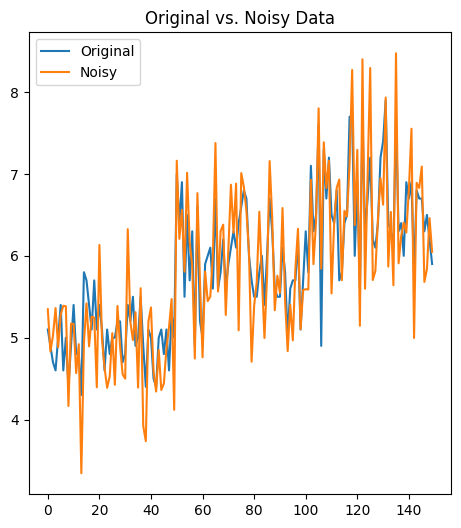

In [10]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

np.random.seed(42)
noise = np.random.normal(0, 0.5, len(iris_df))
iris_df['sepal_length_noisy'] = iris_df['sepal_length'] + noise

# Savitzky-Golay
iris_df['sepal_length_sg'] = savgol_filter(iris_df['sepal_length_noisy'], window_length=5, polyorder=2)

print(iris_df[['sepal_length', 'sepal_length_noisy', 'sepal_length_sg', 'sepal_length_rolling']].head(10))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iris_df['sepal_length'], label='Original')
plt.plot(iris_df['sepal_length_noisy'], label='Noisy')
plt.title('Original vs. Noisy Data')
plt.legend()
plt.show()

4. Handling Outliers:


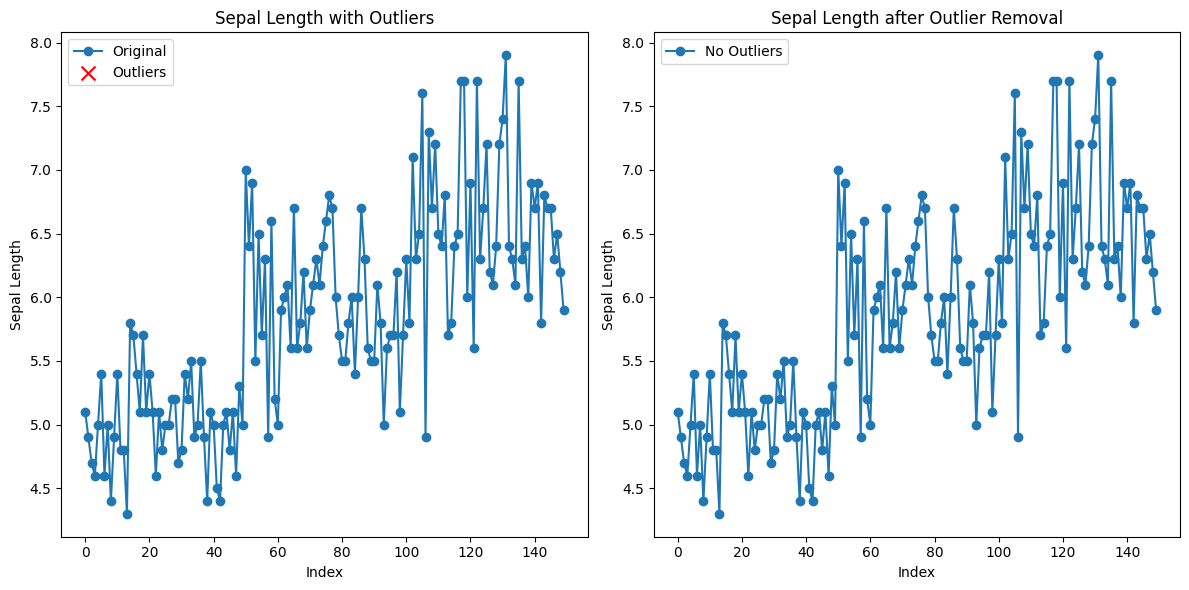

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Z-scores
iris_df['sepal_length_zscore'] = np.abs((iris_df['sepal_length'] - iris_df['sepal_length'].mean()) / iris_df['sepal_length'].std())

#
outliers = iris_df[iris_df['sepal_length_zscore'] > 3]

iris_df_no_outliers = iris_df[iris_df['sepal_length_zscore'] <= 3]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(iris_df['sepal_length'], label='Original', marker='o', linestyle='-')
plt.scatter(outliers.index, outliers['sepal_length'], color='red', label='Outliers', marker='x', s=100)
plt.title('Sepal Length with Outliers')
plt.xlabel('Index')
plt.ylabel('Sepal Length')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(iris_df_no_outliers['sepal_length'], label='No Outliers', marker='o', linestyle='-')
plt.title('Sepal Length after Outlier Removal')
plt.xlabel('Index')
plt.ylabel('Sepal Length')
plt.legend()

plt.tight_layout()
plt.show()

NO OUTLIERS FOUND

 5. Feature Selection:


 1. Filter Methods

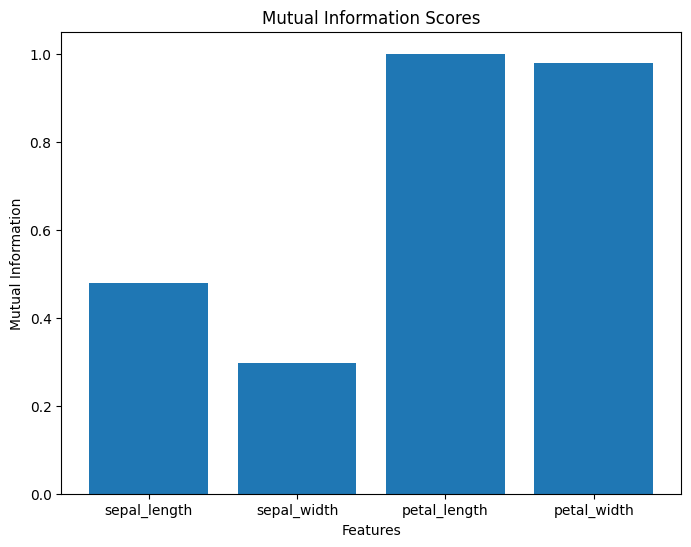

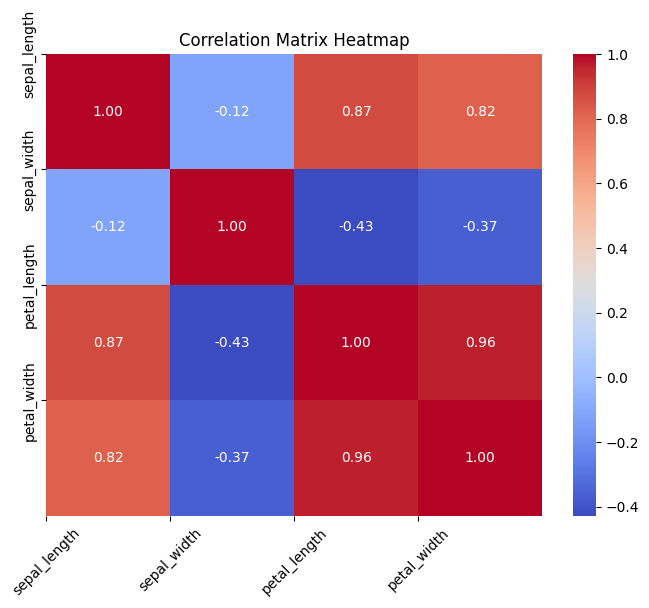

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

mutual_info = mutual_info_classif(X, y)

# mutual information
plt.figure(figsize=(8, 6))
plt.bar(X.columns, mutual_info)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Scores')
plt.show()

correlation_matrix = X.corr()

#  heatmap correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=45)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

there is a strong correlation between petal_width and petal_length (0.96)

 2. Wrapper Methods (e.g., Recursive Feature Elimination, Backward).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Num Features: 2
Selected Features: ['sepal_width', 'petal_width']
Feature Ranking: [3 1 2 1]
Index(['sepal_width', 'petal_width', 'petal_length', 'sepal_length'], dtype='object')


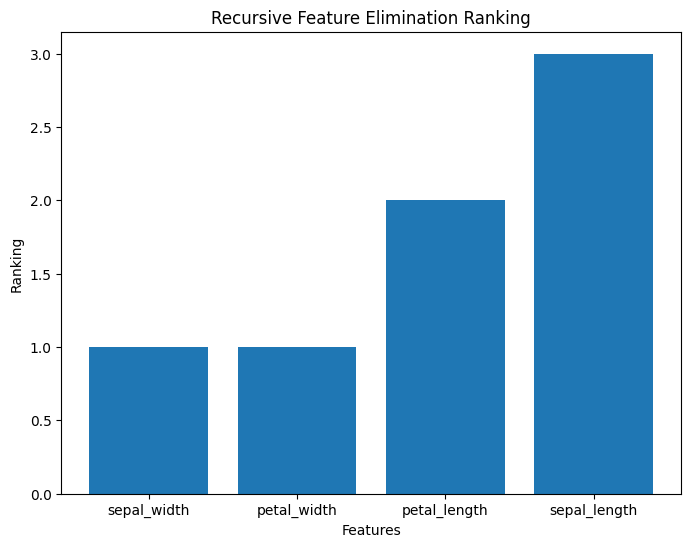

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(solver='liblinear', multi_class='auto') # Specify solver for LogisticRegression
selector = RFE(estimator, n_features_to_select=2, step=1) # Select top 2 features
selector = selector.fit(X, y)

print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % list(X.columns[selector.support_]))
print("Feature Ranking: %s" % selector.ranking_)

# rankings
order=selector.ranking_.argsort()
print(X.columns[order])
plt.figure(figsize=(8, 6))
plt.bar(X.columns[order], selector.ranking_[order])
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Recursive Feature Elimination Ranking')
plt.show()

 3. Embedded Methods (e.g., Lasso regression).


Important Features (Non-Zero Coefficients): ['petal_length']


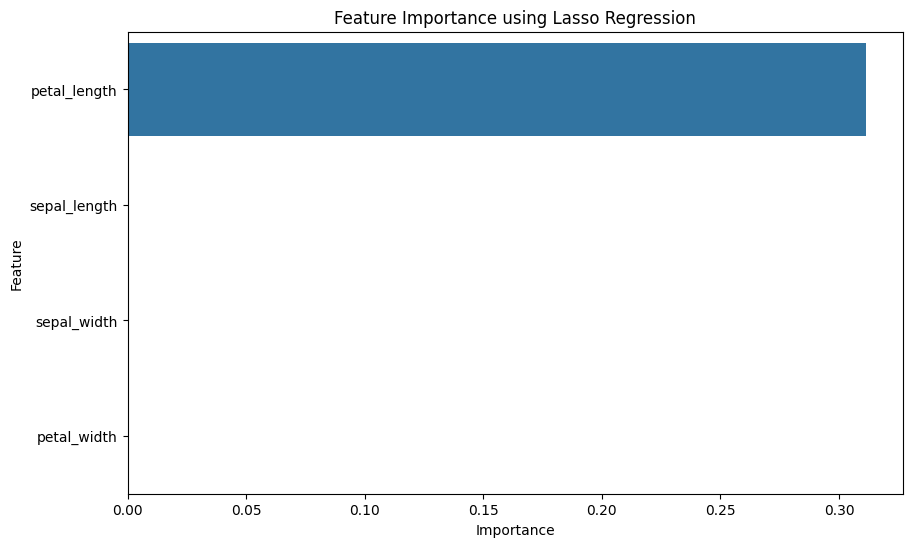

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import seaborn as sns


lasso = Lasso(alpha=0.4)
lasso.fit(X, y)

feature_importance = np.abs(lasso.coef_)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
important_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]
print("\nImportant Features (Non-Zero Coefficients):", important_features)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Lasso Regression')
plt.show()